In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, train_test_split 
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve 
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#plots' parameters with seaborn
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale = 1, rc = {"lines.linewidth": 2, 'font_family': [u'times']})

In [3]:
#loading dataset
df = pd.read_excel("C:/Users/ezgi turalı/Desktop/Master/ads542/HW2.xlsx")


In [4]:
#examining the dataset 
df.head()

,S.No,plod,name,title,gender,culture,dateOfBirth,DateoFdeath,mother,father,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 30 columns):
S.No                 1946 non-null int64
plod                 1946 non-null float64
name                 1946 non-null object
title                938 non-null object
gender               1946 non-null int64
culture              677 non-null object
dateOfBirth          433 non-null float64
DateoFdeath          444 non-null float64
mother               21 non-null object
father               26 non-null object
heir                 23 non-null object
house                1519 non-null object
spouse               276 non-null object
book1                1946 non-null int64
book2                1946 non-null int64
book3                1946 non-null int64
book4                1946 non-null int64
book5                1946 non-null int64
isAliveMother        21 non-null float64
isAliveFather        26 non-null float64
isAliveHeir          23 non-null float64
isAliveSpouse        276 non-

In [6]:
#checking for NANs values
nans = df.isna().sum()
nans

S.No                    0
plod                    0
name                    0
title                1008
gender                  0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [7]:
#data preperation
df.age.describe()

count       433.000000
mean      -1293.563510
std       19564.340993
min     -298001.000000
25%          18.000000
50%          27.000000
75%          50.000000
max         100.000000
Name: age, dtype: float64

In [8]:
#mean age
print(df["age"].mean())

-1293.5635103926097


In [9]:
#checking which characters have a negative age 
print(df["name"][df["age"] < 0])
print(df['age'][df['age'] < 0])

1684    Doreah
1868    Rhaego
Name: name, dtype: object
1684   -277980.0
1868   -298001.0
Name: age, dtype: float64


In [10]:
#according to https://gameofthrones.fandom.com/wiki/Doreah Doreah is actually around 25
#and 
#accoding to https://gameofthrones.fandom.com/wiki/Rhaego Rhaego was never even born so;
#replacing negative ages wtih the correct ones
df.loc[1684, "age"] = 25.0
df.loc[1868, "age"] = 0.0

In [11]:
#mean seems accurate
print(df["age"].mean())

36.70438799076212


In [12]:
#filling the NANs that we can
df["age"].fillna(df["age"].mean(), inplace=True)
df.fillna("", inplace=True)


In [13]:
nans = df.isna().sum()
nans

S.No                 0
plod                 0
name                 0
title                0
gender               0
culture              0
dateOfBirth          0
DateoFdeath          0
mother               0
father               0
heir                 0
house                0
spouse               0
book1                0
book2                0
book3                0
book4                0
book5                0
isAliveMother        0
isAliveFather        0
isAliveHeir          0
isAliveSpouse        0
isMarried            0
isNoble              0
age                  0
numDeadRelations     0
boolDeadRelations    0
isPopular            0
popularity           0
isAlive              0
dtype: int64

Text(0.5, 1.0, 'Noble and Popular vs Mortality')

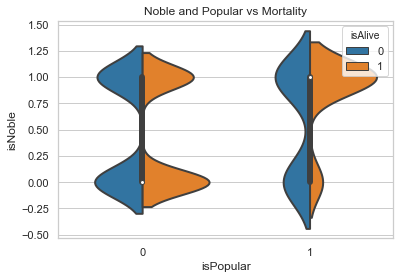

In [14]:
#checking variables
sns.violinplot("isPopular", "isNoble", hue="isAlive", data=df ,split=True).set_title('Noble and Popular vs Mortality')


Text(0.5, 1.0, 'Gender and Popular vs Mortality')

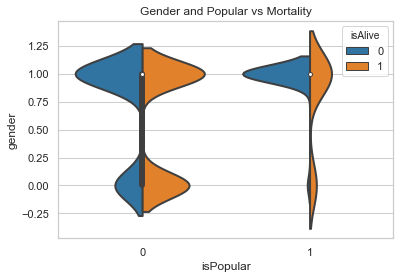

In [15]:
sns.violinplot("isPopular", "gender", hue="isAlive", data=df ,split=True).set_title('Gender and Popular vs Mortality')


Text(0.5, 1.0, 'Married and Popular vs Mortality')

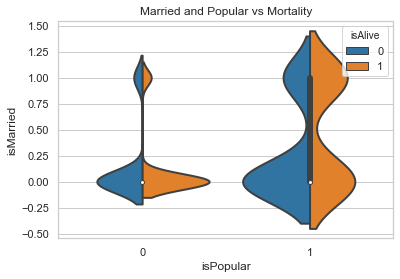

In [16]:
sns.violinplot("isPopular", "isMarried", hue="isAlive", data=df ,split=True).set_title('Married and Popular vs Mortality')



Text(0.5, 1.0, 'Book_1 and Popular vs Mortality')

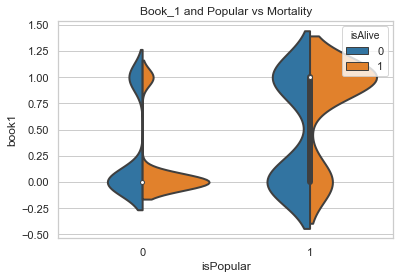

In [17]:
sns.violinplot("isPopular", "book1", hue="isAlive", data=df ,split=True).set_title('Book_1 and Popular vs Mortality')

In [18]:
#still correcting data 
set(df['culture'])

{'',
 'Andal',
 'Andals',
 'Asshai',
 "Asshai'i",
 'Astapor',
 'Astapori',
 'Braavos',
 'Braavosi',
 'Crannogmen',
 'Dorne',
 'Dornish',
 'Dornishmen',
 'Dothraki',
 'First Men',
 'Free Folk',
 'Free folk',
 'Ghiscari',
 'Ghiscaricari',
 'Ibbenese',
 'Ironborn',
 'Ironmen',
 'Lhazareen',
 'Lhazarene',
 'Lysene',
 'Lyseni',
 'Meereen',
 'Meereenese',
 'Myrish',
 'Naathi',
 'Northern mountain clans',
 'Northmen',
 'Norvos',
 'Norvoshi',
 'Pentoshi',
 'Qarth',
 'Qartheen',
 'Qohor',
 'Reach',
 'Reachmen',
 'Rhoynar',
 'Riverlands',
 'Rivermen',
 'Sistermen',
 'Stormlander',
 'Stormlands',
 'Summer Islander',
 'Summer Islands',
 'Summer Isles',
 'The Reach',
 'Tyroshi',
 'Vale',
 'Vale mountain clans',
 'Valemen',
 'Valyrian',
 'Westerlands',
 'Westerman',
 'Westermen',
 'Westeros',
 'Wildling',
 'Wildlings',
 'free folk',
 'ironborn',
 'northmen',
 'westermen'}

In [19]:
#there are different names for one culture group.correcting it.
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironborn', 'ironmen'],
    'Mereen': ['meereen', 'meereenese'],
    'RiverLands': ['riverlands', 'rivermen'],
    'Vale': ['vale', 'valemen', 'vale mountain clans']
}

def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()
df.loc[:, "culture"] = [get_cult(x) for x in df["culture"]]


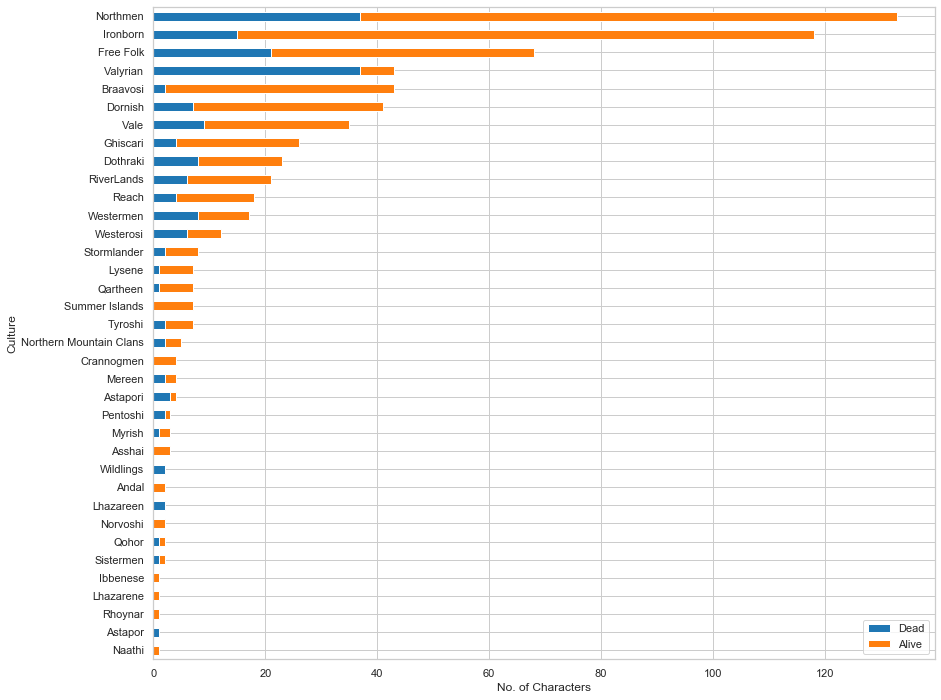

In [20]:
#how does culter affect survival
df.loc[:, "culture"] = [get_cult(x) for x in df.culture.fillna("")]
data = df.groupby(["culture", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
data.loc[:, "total"]= data.sum(axis = 1)
p = data[data.index != ""].sort_values("total")[[0, 1]].plot.barh(stacked = True, rot = 0, figsize = (14, 12),)
_ = p.set(xlabel = "No. of Characters", ylabel = "Culture"), p.legend(["Dead", "Alive"], loc = "lower right")

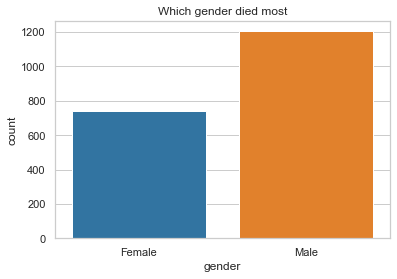

In [21]:
#which gender died most
sns.countplot(df['gender'])
plt.title('Which gender died most')
plt.xticks(np.arange(2),('Female','Male'))
plt.show()

C:\Users\monster\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


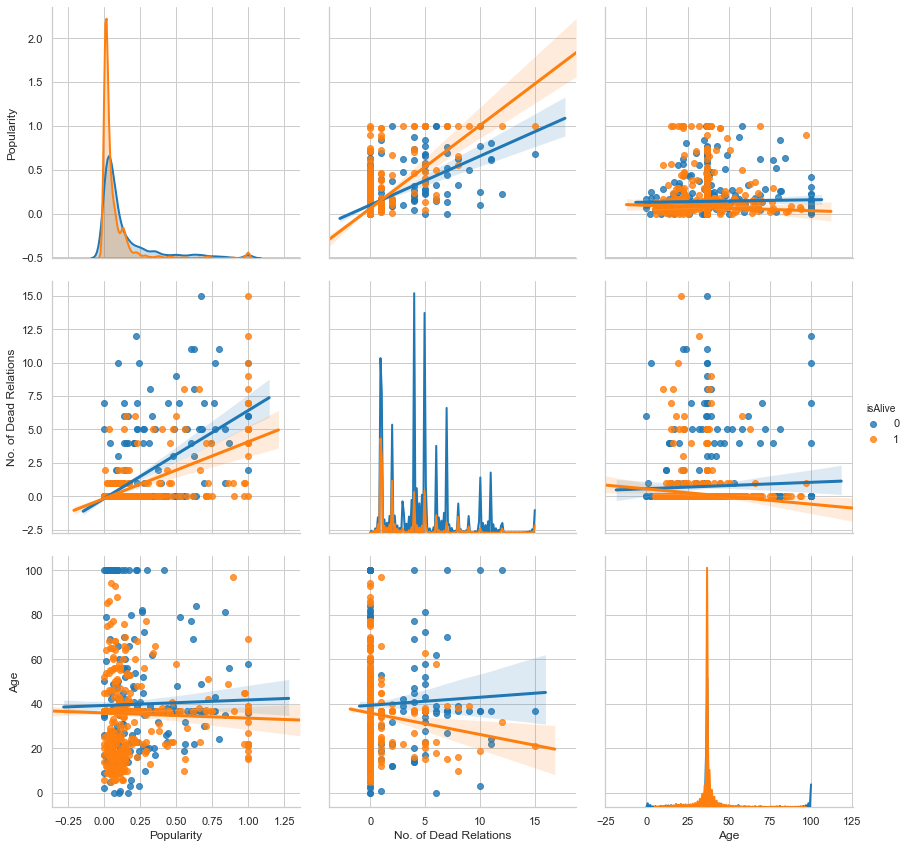

In [22]:
#What is the relationship between popularity, number of dead relations, and age?
p = sns.pairplot(df[(df.age >= 0)][["popularity", "numDeadRelations", "age", "isAlive"]], hue = "isAlive", vars = ["popularity", "numDeadRelations", "age"], kind = "reg", size = 4.)
_ = p.axes[0][0].set_ylabel("Popularity"), p.axes[1][0].set_ylabel("No. of Dead Relations"), p.axes[2][0].set_ylabel("Age")
_ = p.axes[2][0].set_xlabel("Popularity"), p.axes[2][1].set_xlabel("No. of Dead Relations"), p.axes[2][2].set_xlabel("Age")

In [23]:
df

,S.No,plod,name,title,gender,culture,dateOfBirth,DateoFdeath,mother,father,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0.946,Viserys II Targaryen,,1,,,,Rhaenyra Targaryen,Daemon Targaryen,...,0,,0,0,36.704388,11,1,1,0.605351,0
1,2,0.613,Walder Frey,Lord of the Crossing,1,RiverLands,208,,,,...,,1,1,1,97.000000,1,1,1,0.896321,1
2,3,0.507,Addison Hill,Ser,1,,,,,,...,,,0,1,36.704388,0,0,0,0.267559,1
3,4,0.924,Aemma Arryn,Queen,0,,82,105,,,...,,0,1,1,23.000000,0,0,0,0.183946,0
4,5,0.383,Sylva Santagar,Greenstone,0,Dornish,276,,,,...,,1,1,1,29.000000,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0.197,Luwin,,1,Westerosi,,299,,,...,,,0,0,36.704388,0,0,1,0.351171,0
1942,1943,0.013,Reek,,1,,,299,,,...,,,0,0,36.704388,0,0,0,0.096990,0
1943,1944,0.480,Symeon Star-Eyes,,1,,,,,,...,,,0,0,36.704388,0,0,0,0.030100,1
1944,1945,0.363,Coldhands,,1,,,,,,...,,,0,0,36.704388,0,0,0,0.130435,1


In [24]:
#saving a copy of the dataset just in case
df2 = df.copy(deep=True)

In [25]:
#droping columns that are not useful
drop = ["S.No", "plod", "title", "dateOfBirth", "DateoFdeath", "mother", "father", "heir", "house", 
        "spouse", "book2", "book3", "book4", "book5", "isAliveMother", "isAliveFather","isAliveHeir",
        "isAliveSpouse", "popularity", "name"]
df = df.drop(drop, axis=1)

In [26]:
df

,gender,culture,book1,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,isAlive
0,1,,0,0,0,36.704388,11,1,1,0
1,1,RiverLands,1,1,1,97.000000,1,1,1,1
2,1,,0,0,1,36.704388,0,0,0,1
3,0,,0,1,1,23.000000,0,0,0,0
4,0,Dornish,0,1,1,29.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1941,1,Westerosi,1,0,0,36.704388,0,0,1,0
1942,1,,0,0,0,36.704388,0,0,0,0
1943,1,,1,0,0,36.704388,0,0,0,1
1944,1,,0,0,0,36.704388,0,0,0,1


In [27]:
#turning categorical variables into one-hot encoded variables
df = pd.get_dummies(df)

In [28]:
#creating response and explanatory variables 
y=df.isAlive #response
X=df.drop('isAlive', axis=1)

In [29]:
df

,gender,book1,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,isAlive,culture_,...,culture_RiverLands,culture_Sistermen,culture_Stormlander,culture_Summer Islands,culture_Tyroshi,culture_Vale,culture_Valyrian,culture_Westermen,culture_Westerosi,culture_Wildlings
0,1,0,0,0,36.704388,11,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,97.000000,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,36.704388,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,23.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,29.000000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1,1,0,0,36.704388,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1942,1,0,0,0,36.704388,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1943,1,1,0,0,36.704388,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1944,1,0,0,0,36.704388,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#making logit
lr = LogisticRegression()

In [31]:
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
lr.predict(X)

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [33]:
#model's score is pretty good
lr.score(X,y)


0.776464542651593

In [34]:
#finding arya's index number
df2[df2["name"]=="Arya Stark"].index

Int64Index([1466], dtype='int64')

In [35]:
X.iloc[1466]

gender                              0.0
book1                               1.0
isMarried                           0.0
isNoble                             1.0
age                                16.0
numDeadRelations                    8.0
boolDeadRelations                   1.0
isPopular                           1.0
culture_                            0.0
culture_Andal                       0.0
culture_Asshai                      0.0
culture_Astapor                     0.0
culture_Astapori                    0.0
culture_Braavosi                    0.0
culture_Crannogmen                  0.0
culture_Dornish                     0.0
culture_Dothraki                    0.0
culture_Free Folk                   0.0
culture_Ghiscari                    0.0
culture_Ibbenese                    0.0
culture_Ironborn                    0.0
culture_Lhazareen                   0.0
culture_Lhazarene                   0.0
culture_Lysene                      0.0
culture_Mereen                      0.0


In [36]:
#finding survival rate which is 0.557
lr.predict_proba([X.iloc[1466]])

array([[0.44230451, 0.55769549]])

In [37]:
lr.predict([X.iloc[1466]])

array([1], dtype=int64)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif = pd.DataFrame()

In [40]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [41]:
vif["features"] = X.columns

In [42]:
vif

,VIF Factor,features
0,1.096329,gender
1,1.259909,book1
2,1.159677,isMarried
3,1.190497,isNoble
4,1.067366,age
5,2.850064,numDeadRelations
6,2.835421,boolDeadRelations
7,1.565388,isPopular
8,8.181651,culture_
9,1.013139,culture_Andal
